In [184]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
import numpy as np
from pathlib import Path

In [235]:
def data_plot(df, name):
    plt.figure(figsize=(12,7))
    plt.plot(df['GRP'],  df['1+'], 'o', label = name)
    plt.xlabel('GRP')
    plt.ylabel('1+')
    plt.legend()
    plt.show()
    
def regression(f, df):
    return curve_fit(f, df['GRP'], df['1+'], p0=(-max(df['GRP']), 1., max(df['GRP'])))

def e(x, a, b, c):
    return a*np.exp(-b*x) + c

def h(x, a, b, c):
    return a/(x+b) + c

def exp_fit_plot(f, df, popt, name):
    plt.figure(figsize=(12,7))

    plt.plot(df['GRP'],  df['1+'], 'o', label = name)

    X = np.linspace(0, max(df['GRP']), 500)

    plt.plot(X, f(X, popt[0], popt[1], popt[2]), label = 'y =' + str(round(popt[0], 3))+'exp(-'+str(round(popt[1], 3))+'x) + '+str(round(popt[2], 3)))

    plt.xlabel('GRP')
    plt.ylabel('1+')
    plt.title(name)
    plt.legend()
    plt.show()
  
def homog_fit_plot(f, df, popt, name):
    plt.figure(figsize=(12,7))

    plt.plot(df['GRP'],  df['1+'], 'o', label = name)

    X = np.linspace(0, max(df['GRP']), 500)

    plt.plot(X, f(X, popt[0], popt[1], popt[2]), label = 'y =' + str(round(popt[0], 3))+'/(x+'+str(round(popt[1], 3))+') + ' + str(round(popt[2], 3)))

    plt.xlabel('GRP')
    plt.ylabel('1+')
    plt.title(name)
    plt.legend()
    plt.savefig(name+'.png')
    plt.show()
    
def errors(f, df, popt):
    Y = f(df['GRP'], popt[0], popt[1], popt[2])
    return (np.sqrt(mean_squared_error(df['1+'], Y)), r2_score(df['1+'], Y))

In [228]:
def fit_data(file_name):
    
    """
    Path function changes / to \ which is necessary for providing path to below read_excel method.
    output of pd.read_excel is a dictionary with keys being names of the sheets from the xlsx file and values being data frames from these sheets
    
    h is a (homographic) function which is fitted to the data
    
    'data' is a data frame that will be an output of the function fit_data. 
    We start creating it from first two columns from the 'META' sheet
    
    'META' sheet data frame is is imported with some random 'Unnamed: number' column names, 
    so they are changed to ['Id', 'Name'].
    First row of the data frame is actually our column names, so it can be dropped.
    
    First sheet is no longer useful after above operations, 
    so it's deleted which simplifies for loop that appears in the next part of the code.
    From the data.xlsx file there was imported some wild additional sheet that I could not see in Excel, 
    so I deleted it as well for the same reason as above.
    
    A, B, C are lists to which estimated by curve_fit function parameters a, b, c of homographic fit are appended in the loop for each data frame
    and popt consists of aforementioned parameters.
    
    """
    path = Path(r"./") 
    sheets_dict = pd.read_excel(path/file_name, sheet_name=None)
    
    def h(x, a, b, c):
        return a/(x+b) + c 
    
    data = pd.DataFrame(sheets_dict['META'][['Unnamed: 0', 'Unnamed: 2']]) 
    data.columns = ['Id', 'Name']
    data = data.iloc[1: , :]
    
    del sheets_dict['META']
    del sheets_dict['Dictionaries']
    
    A = []
    B = []
    C = []
    
    for key in sheets_dict:
        df = pd.DataFrame(sheets_dict[key])
        popt, pcov = curve_fit(h, df['GRP'], df['1+'], p0=(-max(df['GRP']), 1., max(df['GRP'])))
        A.append(popt[0])
        B.append(popt[1])
        C.append(popt[2])
    data['a'] = A
    data['b'] = B
    data['c'] = C
    
    return data

In [229]:
df = fit_data("data.xlsx")
df

C:\Users\Radek\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Id,Name,a,b,c
1,1,A,-9312.084537,148.231691,61.171933
2,2,B,-3756.235054,150.138724,24.678019
3,3,C,-7058.487048,132.333580,52.780304
4,4,D,-7157.822817,68.509084,99.011667


In [230]:
df_1 = pd.read_excel(r'C:\Users\Radek\Desktop\Python\MEDIACOM\data.xlsx', sheet_name='Tab 1')
df_2 = pd.read_excel(r'C:\Users\Radek\Desktop\Python\MEDIACOM\data.xlsx', sheet_name='Tab 2')
df_3 = pd.read_excel(r'C:\Users\Radek\Desktop\Python\MEDIACOM\data.xlsx', sheet_name='Tab 3')
df_4 = pd.read_excel(r'C:\Users\Radek\Desktop\Python\MEDIACOM\data.xlsx', sheet_name='Tab 4')

# DF_1

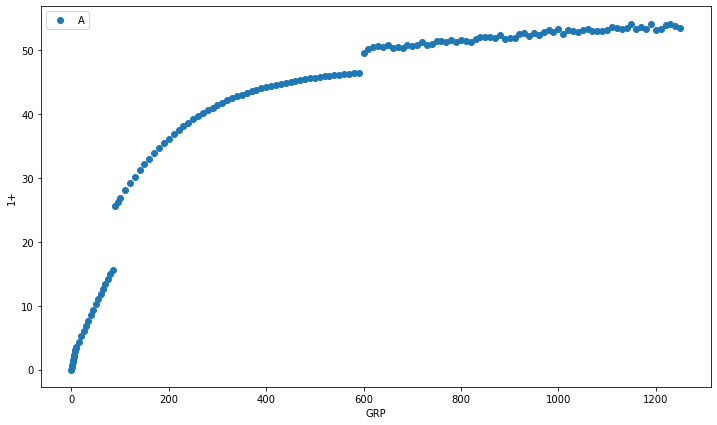

In [231]:
data_plot(df_1, 'A')

### Exponential regression

C:\Users\Radek\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


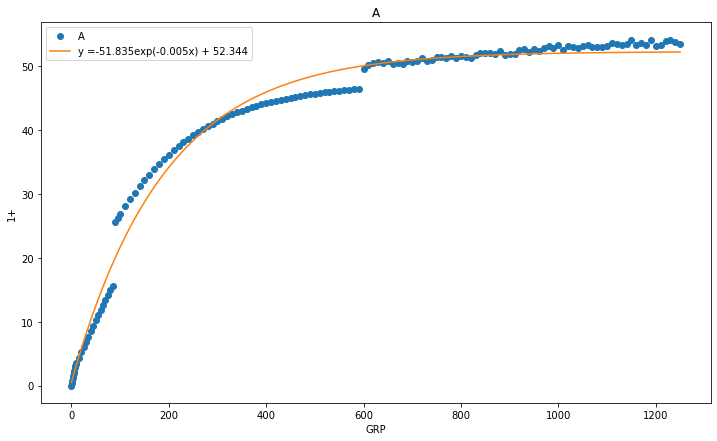

MSE = 1.8908385034462156, R^2 = 0.9876003746570329


In [247]:
popt, pcov = regression(e, df_1)
exp_fit_plot(e, df_1, popt, 'A')
a, b = errors(e, df_1, popt)
print('MSE = '+str(a) + ', R^2 = '+ str(b))

### Homographic regression

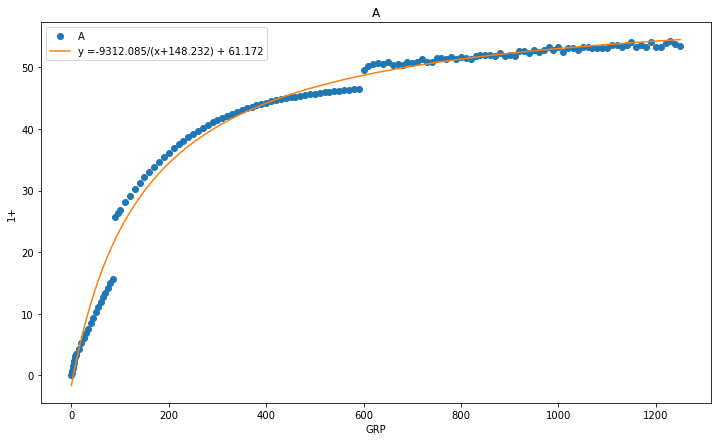

MSE = 1.706289257371485, R^2 = 0.9899027060055385


In [249]:
popt, pcov = regression(h, df_1)
homog_fit_plot(h, df_1, popt, 'A')
a, b = errors(h, df_1, popt)
print('MSE = '+str(a) + ', R^2 = '+ str(b))

# DF_2

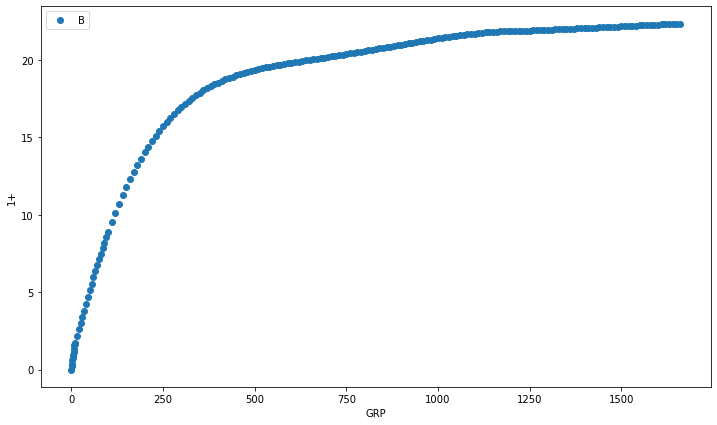

In [238]:
data_plot(df_2, 'B')

### Exponential

C:\Users\Radek\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


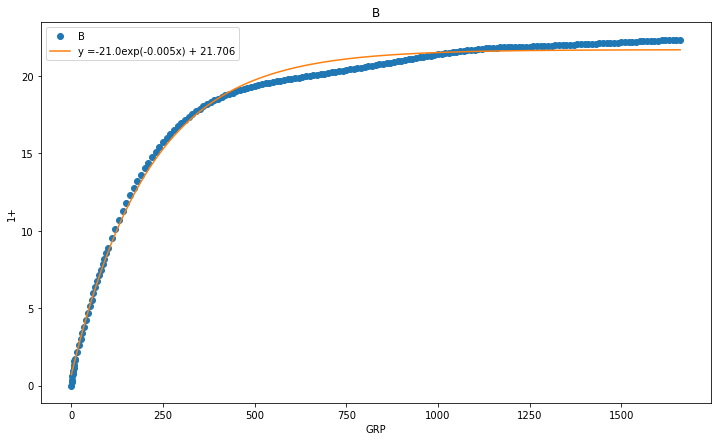

MSE = 0.419519196815342, R^2 = 0.9958216501966253


In [251]:
popt, pcov = regression(e, df_2)
exp_fit_plot(e, df_2, popt, 'B')
a, b = errors(e, df_2, popt)
print('MSE = '+str(a) + ', R^2 = '+ str(b))

### Homographic function

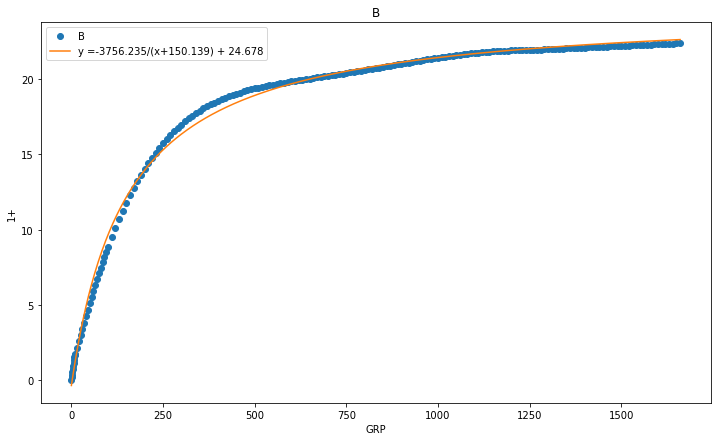

MSE = 0.3839610776372792, R^2 = 0.9964999397351106


In [253]:
popt, pcov = regression(h, df_2)
homog_fit_plot(h, df_2, popt, 'B')
a, b = errors(h, df_2, popt)
print('MSE = '+str(a) + ', R^2 = '+ str(b))

# DF_3

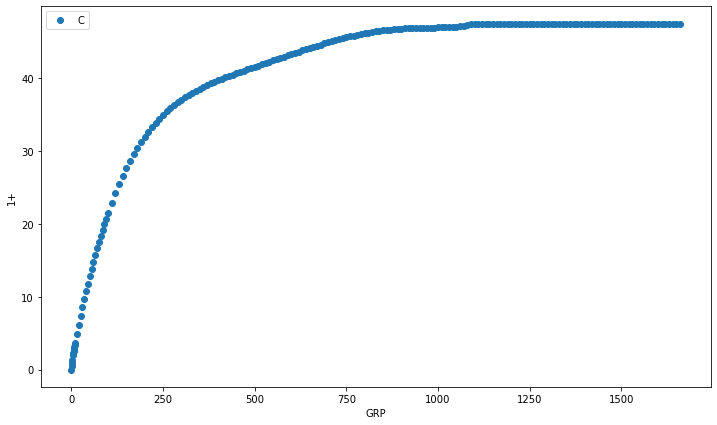

In [241]:
data_plot(df_3, 'C')

### Exponential

C:\Users\Radek\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


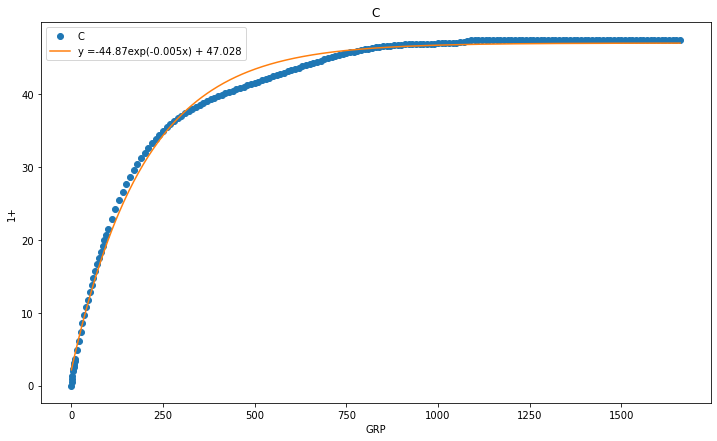

MSE = 0.9495295666125213, R^2 = 0.9952396620718638


In [242]:
popt, pcov = regression(e, df_3)
exp_fit_plot(e, df_3, popt, 'C')
a, b = errors(e, df_3, popt)
print('MSE = '+str(a) + ', R^2 = '+ str(b))

### Homographic function

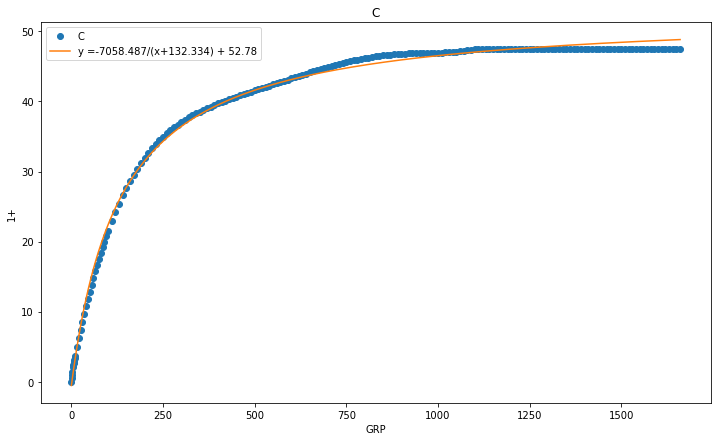

MSE = 0.6935685719793815, R^2 = 0.9974601994680996


In [243]:
popt, pcov = regression(h, df_3)
homog_fit_plot(h, df_3, popt, 'C')
a, b = errors(h, df_3, popt)
print('MSE = '+str(a) + ', R^2 = '+ str(b))

# DF_4

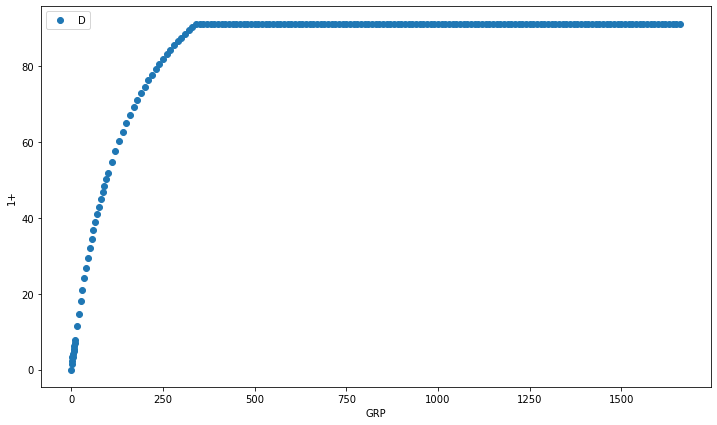

In [244]:
data_plot(df_4, 'D')

### Exponential

C:\Users\Radek\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


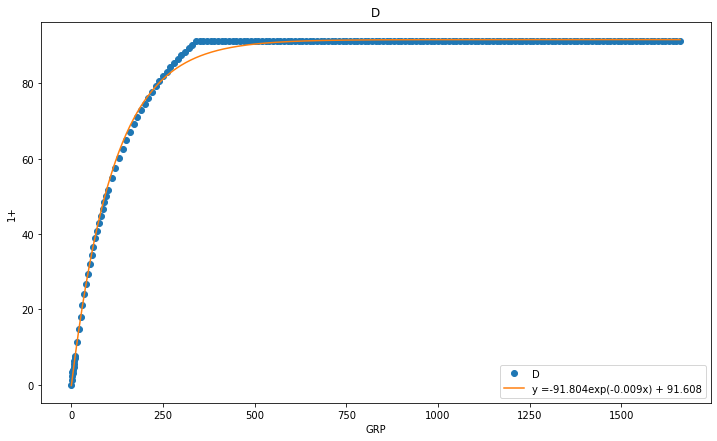

MSE = 1.0686326756873108, R^2 = 0.9982853072406159


In [245]:
popt, pcov = regression(e, df_4)
exp_fit_plot(e, df_4, popt, 'D')
a, b = errors(e, df_4, popt)
print('MSE = '+str(a) + ', R^2 = '+ str(b))

### Homographic function

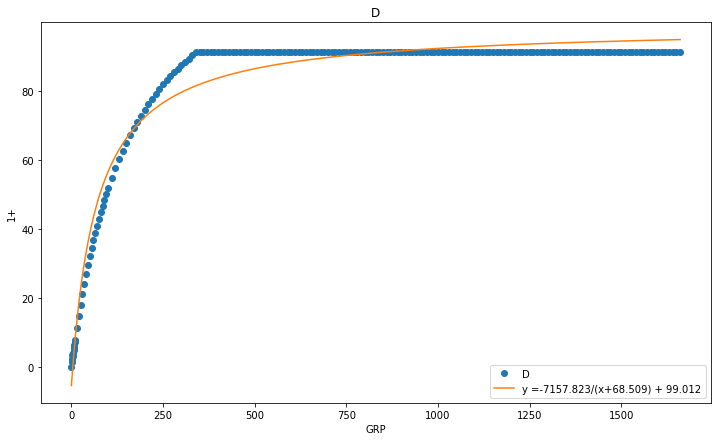

MSE = 3.939204263011113, R^2 = 0.9767005098647594


In [246]:
popt, pcov = regression(h, df_4)
homog_fit_plot(h, df_4, popt, 'D')
a, b = errors(h, df_4, popt)
print('MSE = '+str(a) + ', R^2 = '+ str(b))